In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
import pickle
import myUtils
import os
import matplotlib.pyplot as plt
from myUtils import *
from models.utils import *
from APOC import *
from score import ScoreUtils
import sys
sys.path.append('models')

SEED = 84
torch.manual_seed(SEED)
warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch._C._jit_set_texpr_fuser_enabled(False)
model_name = 'huawei-noah/TinyBERT_General_4L_312D'

In [2]:
# can be sentiment/dilemma/corona
dataset_name = 'corona'
model_type = 'tinybert'
sorting = 'confidence'
delta = 0.1
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'

In [3]:
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast = False)
myUtils.model = model
myUtils.tokenizer = tokenizer

In [4]:
explanations  = pickle.load(open(f"{folder_name}/exps_list.pickle", "rb" ))
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
print(f'anchor examples len: {len(anchor_examples)}')
print(f'explanations len: {len(explanations)}')
    
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))

anchor examples len: 3325
explanations len: 2739


# APOC

## Corona

In [10]:
dataset_name = 'corona'
model_type = 'tinybert'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model

### Apoc

In [11]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", num_removes=10)

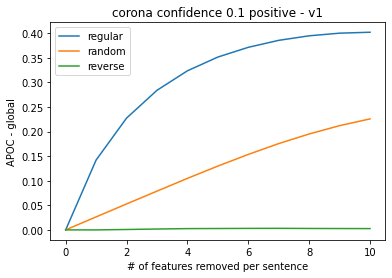

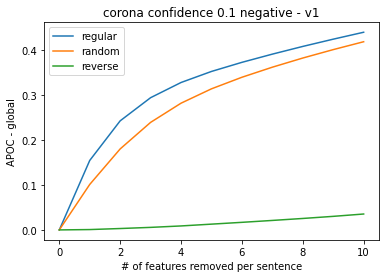

In [12]:
apoc.apoc_global('v1', 'remove')

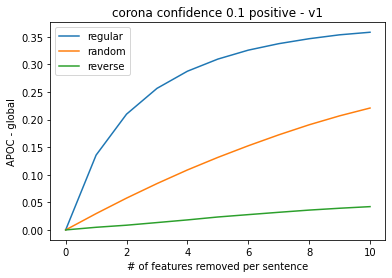

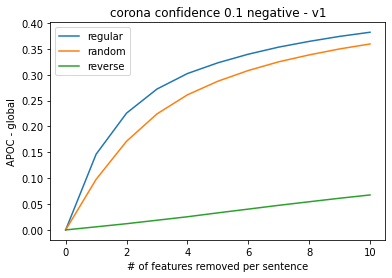

In [13]:
apoc.apoc_global('v1', 'replace')

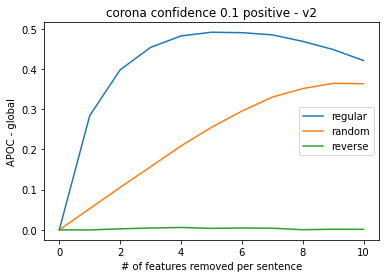

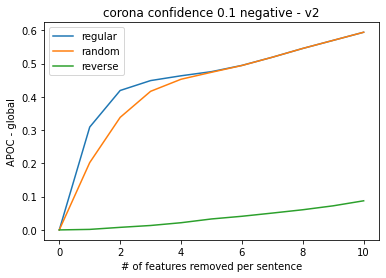

In [14]:
apoc.apoc_global('v2', 'remove')

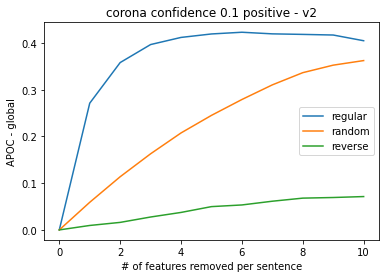

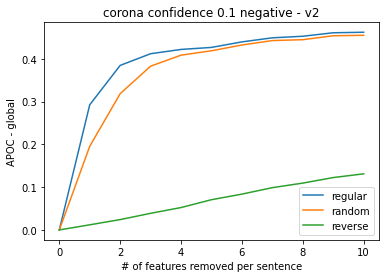

In [15]:
apoc.apoc_global('v2', 'replace')

### Compare

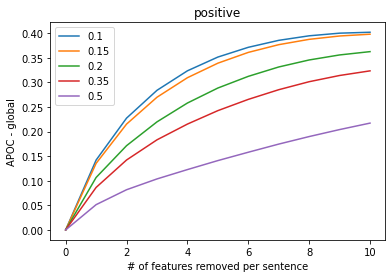

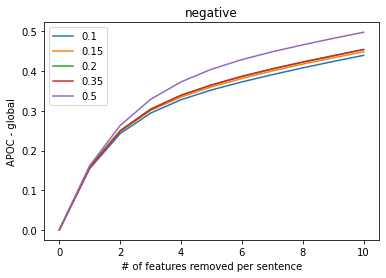

In [6]:
deltas = [0.1, 0.15, 0.2, 0.35, 0.5]
get_scores_fn = lambda delta: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{delta}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, deltas, num_removes = 10)

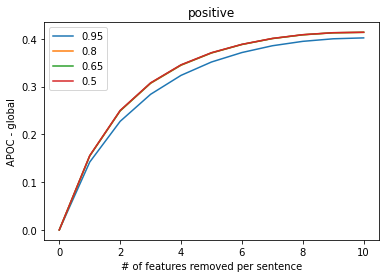

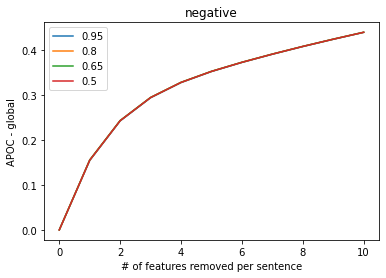

In [7]:
alphas = [0.95, 0.8, 0.65, 0.5]
get_scores_fn = lambda alpha: ScoreUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, alphas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

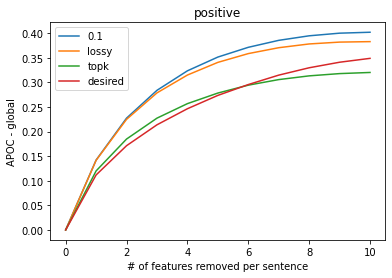

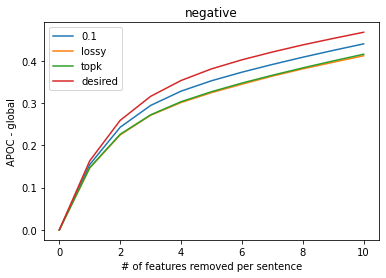

In [8]:
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda optimization: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, optimizations, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

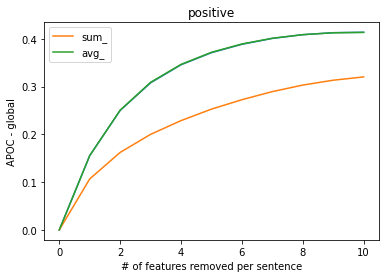

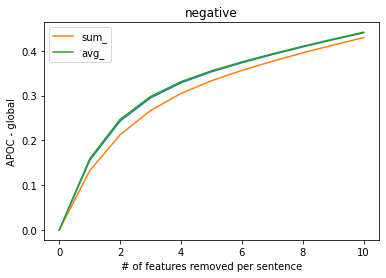

In [20]:
aggragations = ['', 'sum_', 'avg_']
alphas = [0.5, None, None]
get_scores_fn = lambda x: ScoreUtils.get_scores_dict(folder_name, folder_name, trail_path = f"../0.1/{x[0]}scores.xlsx", alpha = x[1])
APOC.compare_apocs(model, tokenizer, zip(aggragations, alphas), get_scores_fn, anchor_examples, labels, aggragations, num_removes = 10)

#### polarity

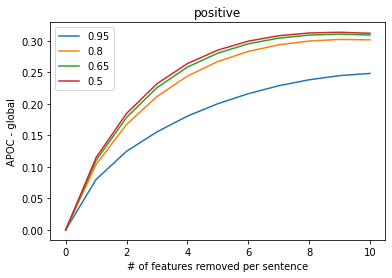

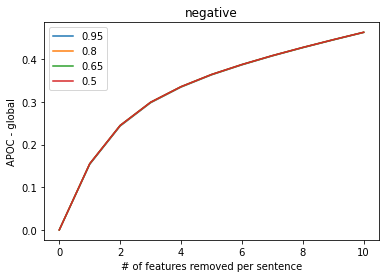

In [21]:
"""polarity"""
alphas = [0.95, 0.8, 0.65, 0.5, 0.4, 0.3]
get_scores_fn = lambda delta: ScoreUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

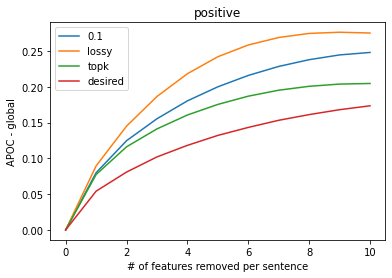

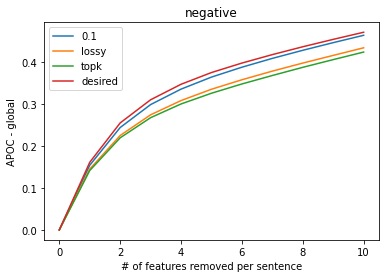

In [42]:
""" polarity """
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda delta: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

## Dilemma

In [ ]:
dataset_name = 'dilemma'
model_type = 'tinybert'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model

### Apoc

In [ ]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", num_removes=10)

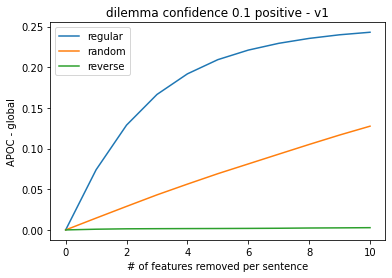

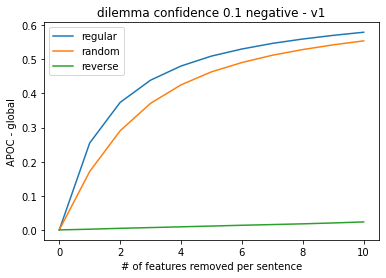

In [13]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

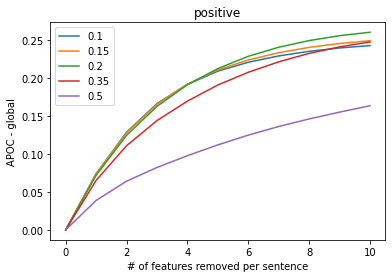

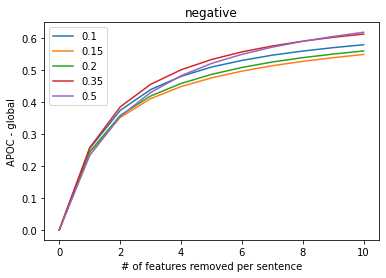

In [14]:
deltas = [0.1, 0.15, 0.2, 0.35, 0.5]
get_scores_fn = lambda delta: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{delta}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, deltas, num_removes = 10)

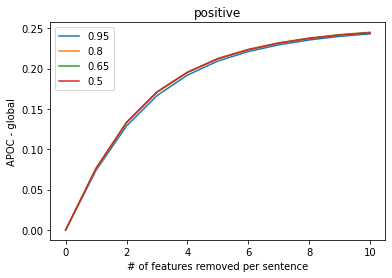

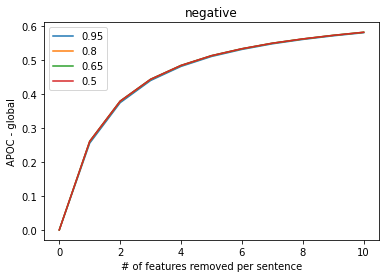

In [16]:
alphas = [0.95, 0.8, 0.65, 0.5, 0.4, 0.3]
get_scores_fn = lambda alpha: ScoreUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, alphas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

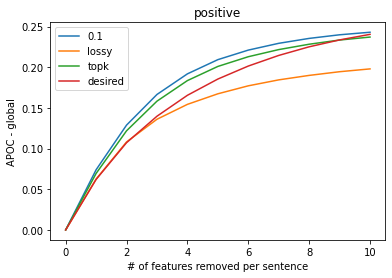

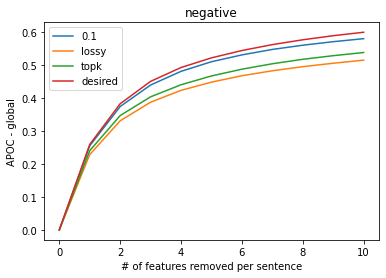

In [17]:
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda optimization: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, optimizations, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

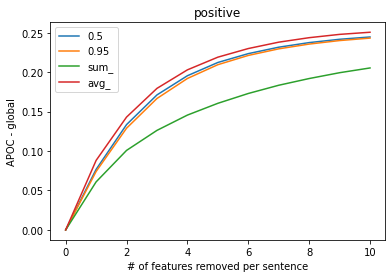

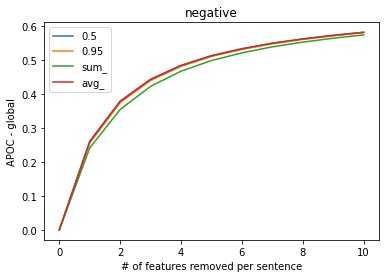

In [20]:
aggragations = ['', '', 'sum_', 'avg_']
alphas = [0.5, 0.95, None, None]
legends = [0.5, 0.95, 'sum', 'avg']
get_scores_fn = lambda x: ScoreUtils.get_scores_dict(folder_name, folder_name, trail_path = f"../0.1/{x[0]}scores.xlsx", alpha = x[1])
APOC.compare_apocs(model, tokenizer, zip(aggragations, alphas), get_scores_fn, anchor_examples, labels, legends, num_removes = 10)

## GRU

In [9]:
dataset_name = 'corona'
model_type = 'gru'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model

### Apoc

In [11]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", num_removes=10)

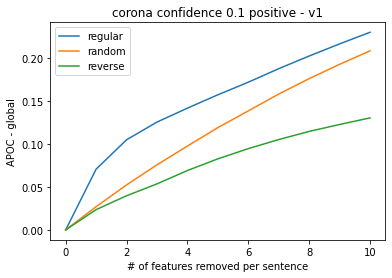

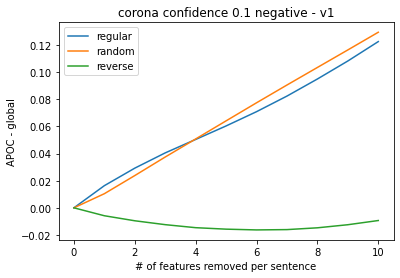

In [12]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

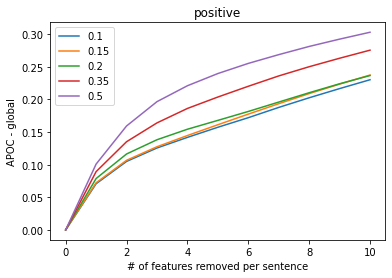

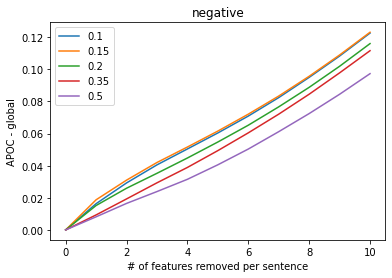

In [13]:
deltas = [0.1, 0.15, 0.2, 0.35, 0.5]
get_scores_fn = lambda delta: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{delta}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, deltas, get_scores_fn, anchor_examples, labels, deltas, num_removes = 10)

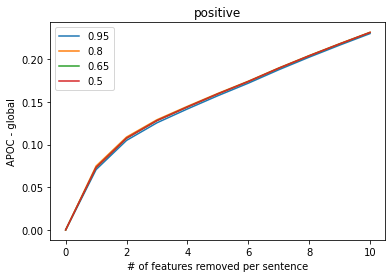

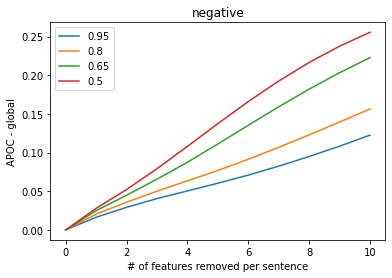

In [15]:
alphas = [0.95, 0.8, 0.65, 0.5]
get_scores_fn = lambda alpha: ScoreUtils.get_scores_dict(folder_name, trail_path = "../0.1/scores.xlsx", alpha = alpha)
APOC.compare_apocs(model, tokenizer, alphas, get_scores_fn, anchor_examples, labels, alphas, num_removes = 10)

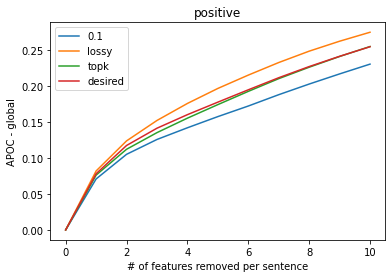

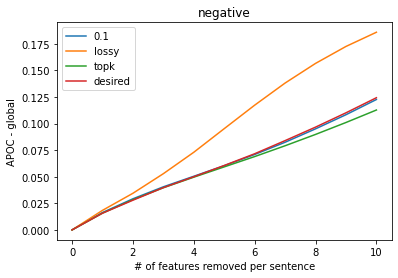

In [16]:
optimizations = [str(0.1), 'lossy', 'topk', 'desired']
get_scores_fn = lambda optimization: ScoreUtils.get_scores_dict(folder_name, trail_path = f"../{optimization}/scores.xlsx")
APOC.compare_apocs(model, tokenizer, optimizations, get_scores_fn, anchor_examples, labels, optimizations, num_removes = 10)

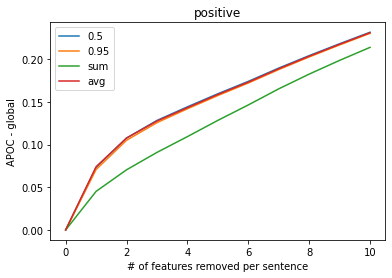

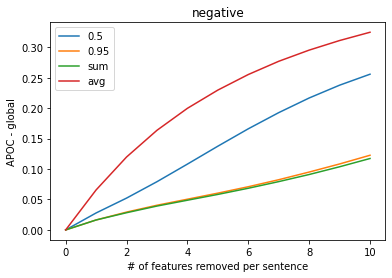

In [17]:
aggragations = ['', '', 'sum_', 'avg_']
alphas = [0.5, 0.95, None, None]
legends = [0.5, 0.95, 'sum', 'avg']
get_scores_fn = lambda x: ScoreUtils.get_scores_dict(folder_name, folder_name, trail_path = f"../0.1/{x[0]}scores.xlsx", alpha = x[1])
APOC.compare_apocs(model, tokenizer, zip(aggragations, alphas), get_scores_fn, anchor_examples, labels, legends, num_removes = 10)

# APOC MODIFIED

params: modefied = True, num_removes = 30

## Corona

In [12]:
dataset_name = 'corona'
model_type = 'tinybert'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [15]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

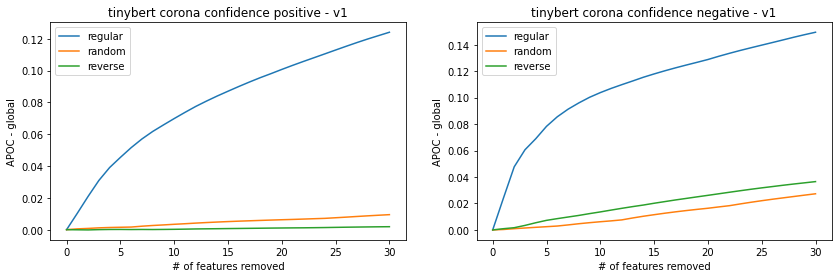

In [16]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

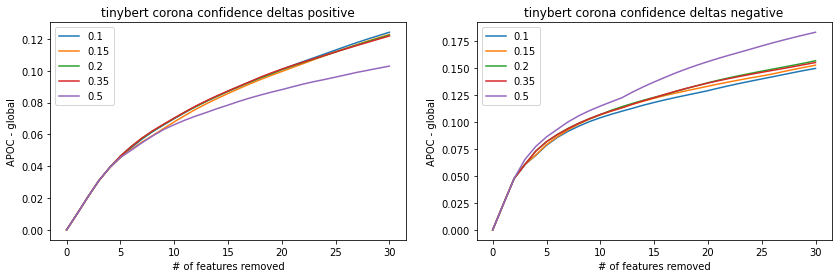

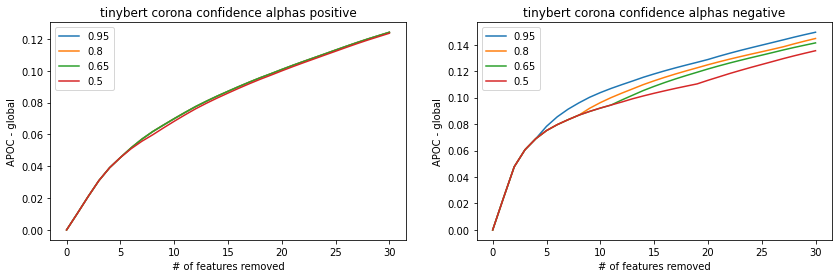

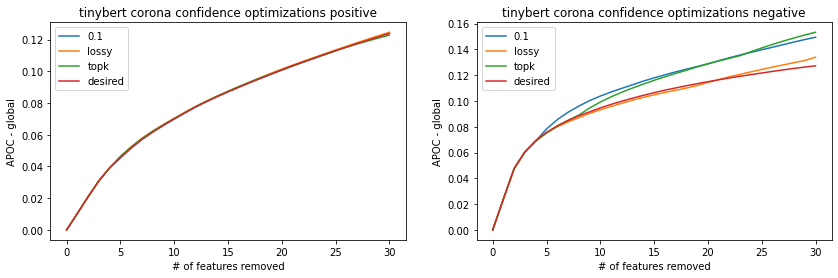

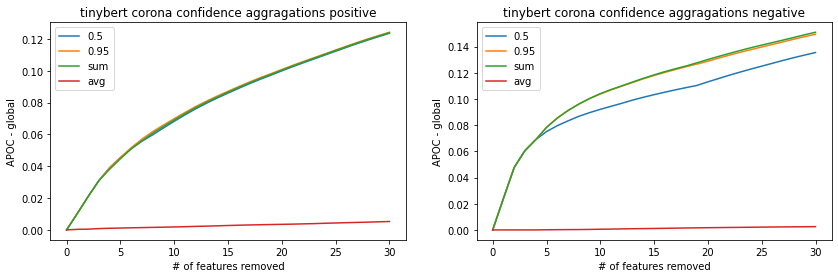

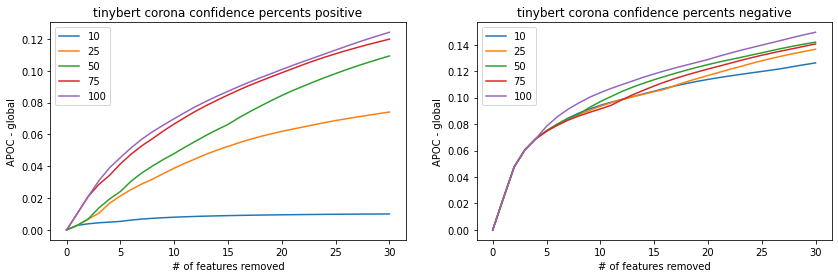

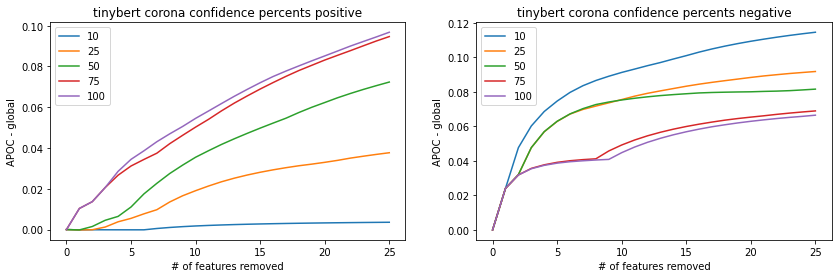

In [13]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## Sentiment

In [5]:
dataset_name = 'sentiment'
model_type = 'tinybert'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [7]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

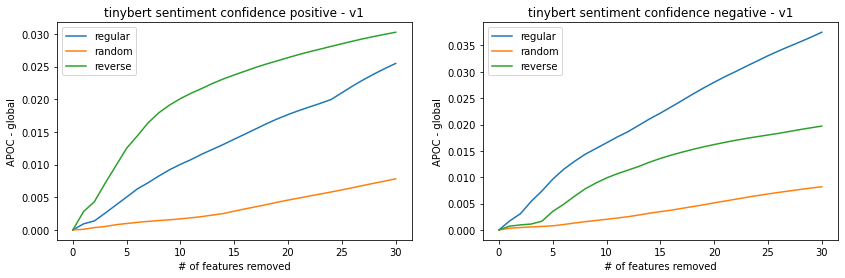

In [6]:
""" lossy apoc """
lossy_folder = f'results/new/{model_type}/{dataset_name}/{sorting}/lossy'
pos_scores, neg_scores = ScoreUtils.get_scores_dict(lossy_folder, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)
apoc.apoc_global('v1', 'remove')

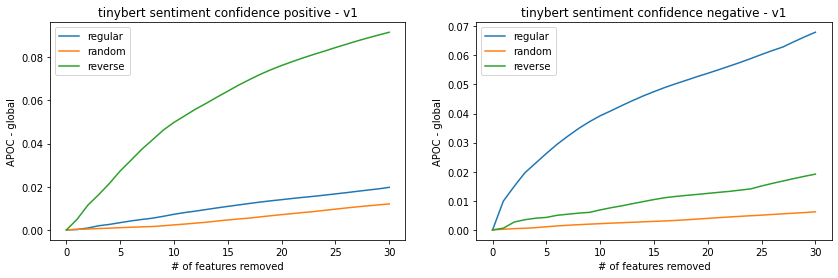

In [23]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

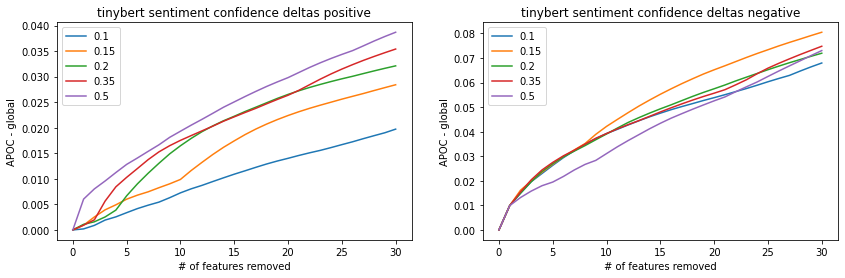

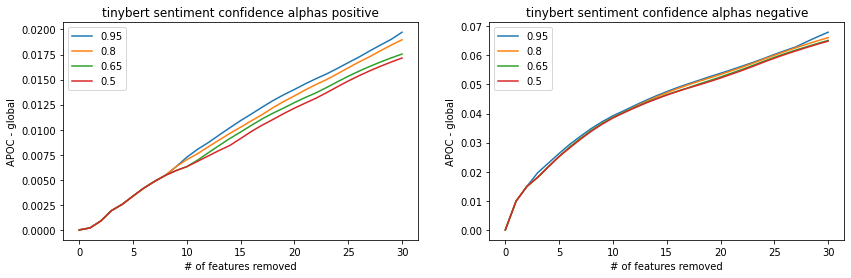

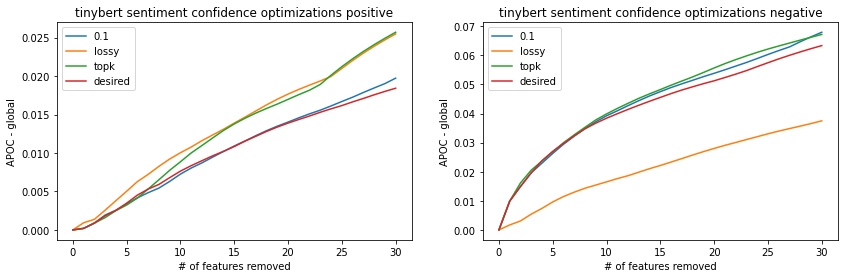

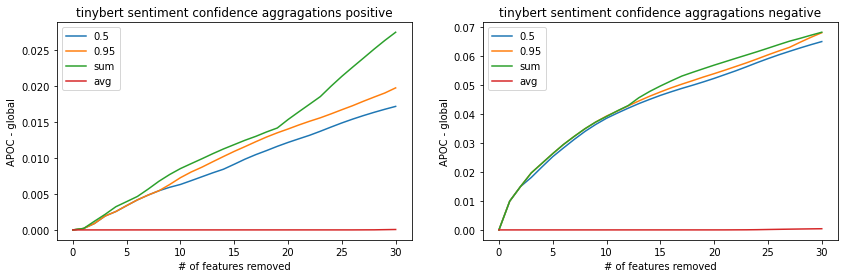

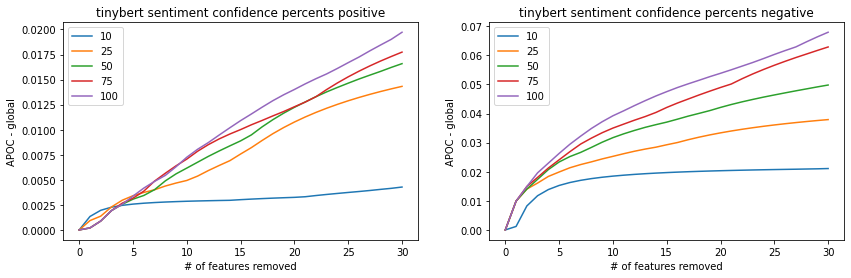

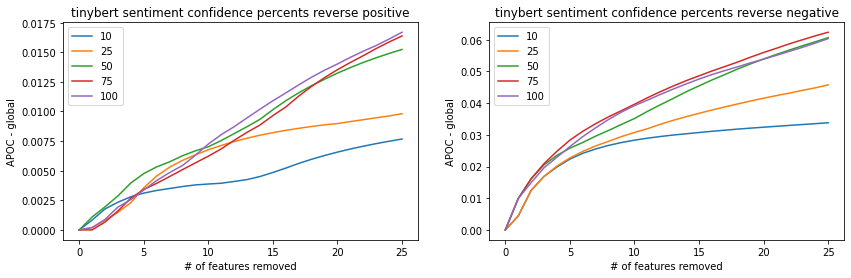

In [8]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## Dilemma

In [9]:
dataset_name = 'dilemma'
model_type = 'tinybert'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [10]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

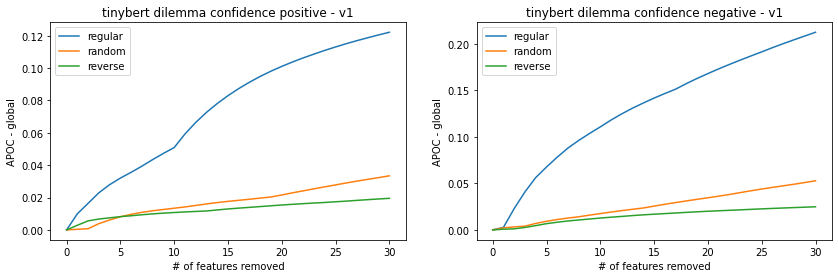

In [11]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

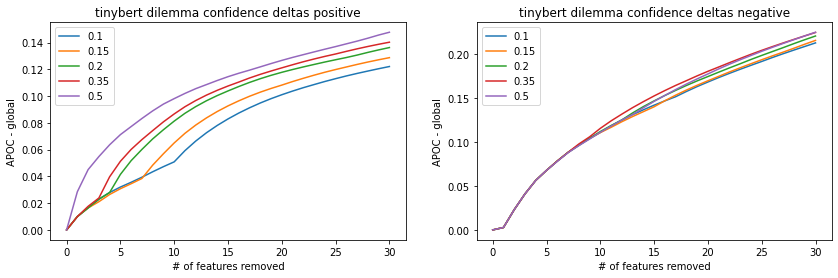

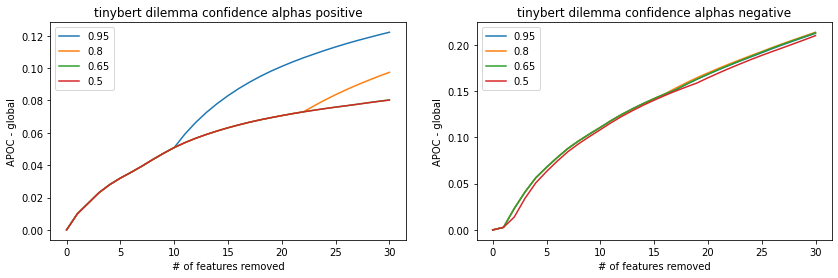

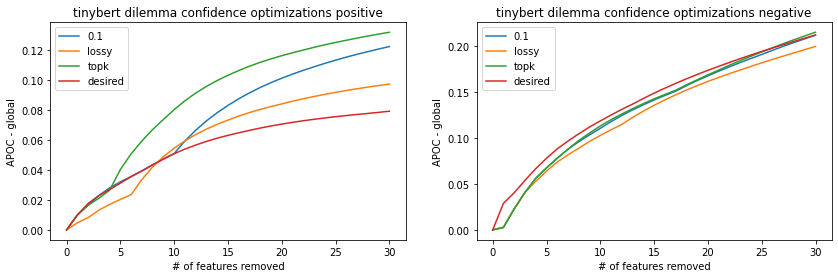

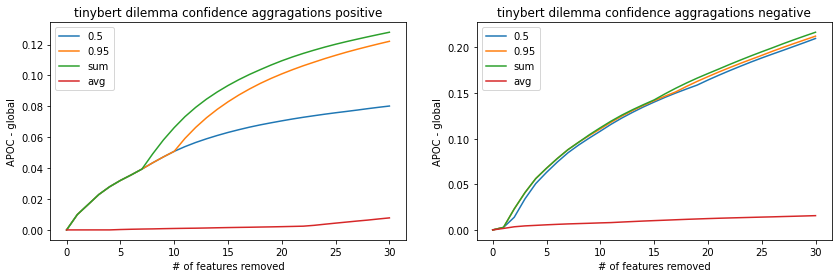

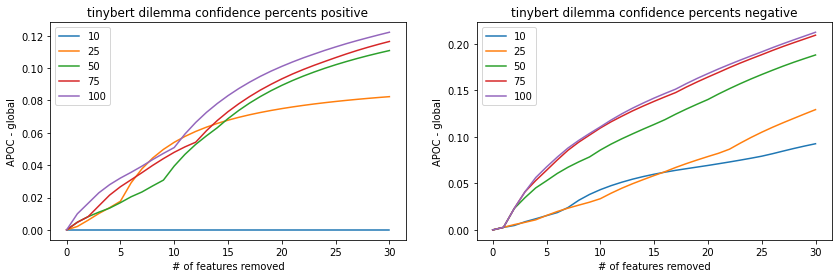

In [ ]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## GRU Corona

In [ ]:
dataset_name = 'corona'
model_type = 'gru'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [ ]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", modified = True, num_removes = 30)

In [ ]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

In [ ]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## GRU Sentiment

In [ ]:
dataset_name = 'sentiment'
model_type = 'gru'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [ ]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", modified = True, num_removes = 30)

In [ ]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

In [ ]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## SVM Corona

In [73]:
dataset_name = 'corona'
model_type = 'svm'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [27]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", modified = True, num_removes = 30)

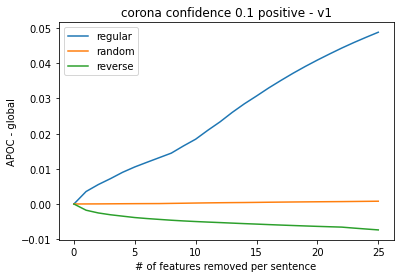

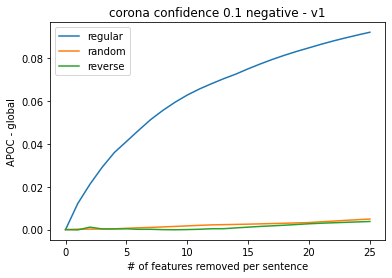

In [28]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

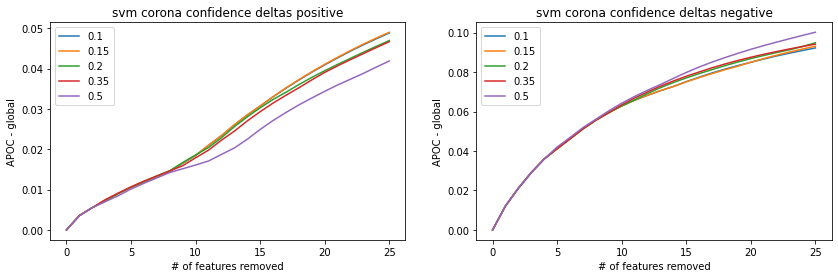

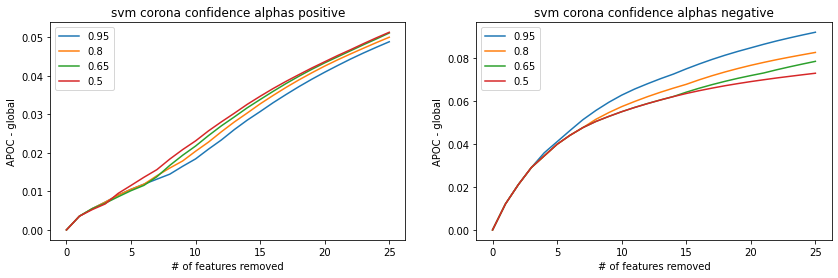

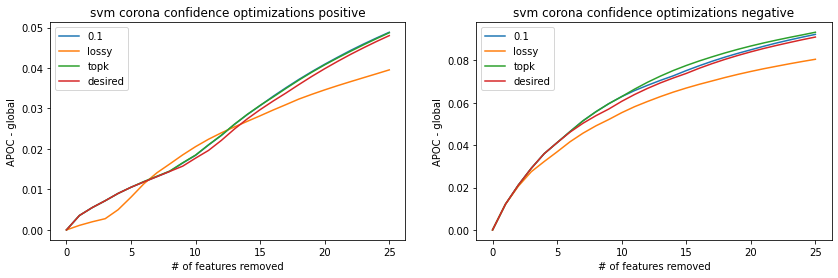

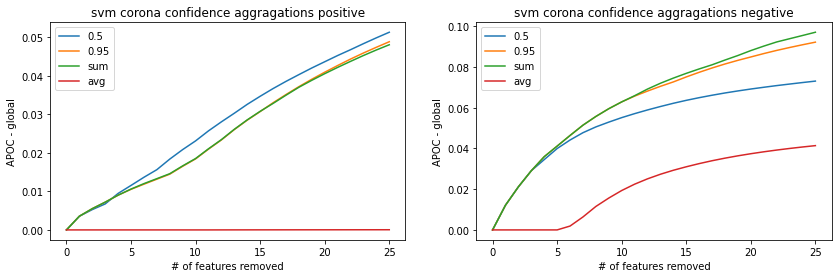

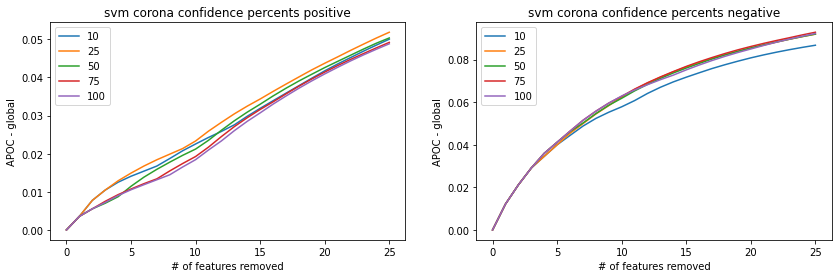

In [74]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## SVM Sentiment

In [75]:
dataset_name = 'sentiment'
model_type = 'svm'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [43]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", modified = True, num_removes = 30)

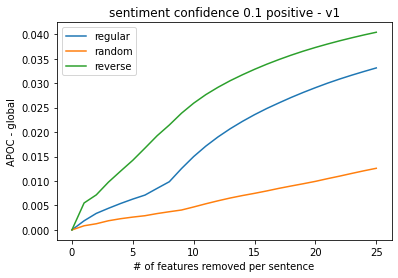

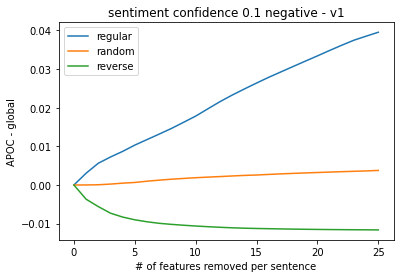

In [44]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

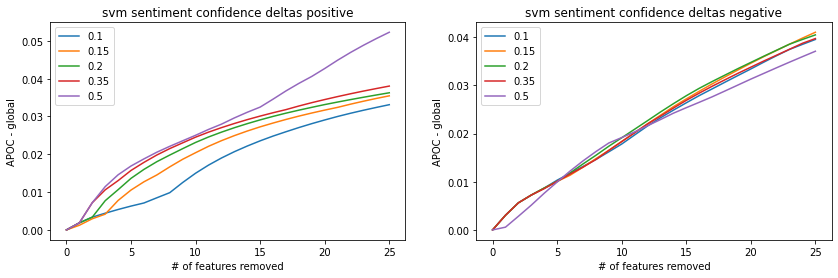

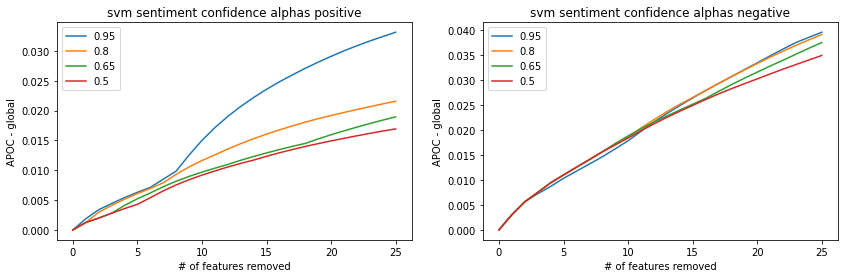

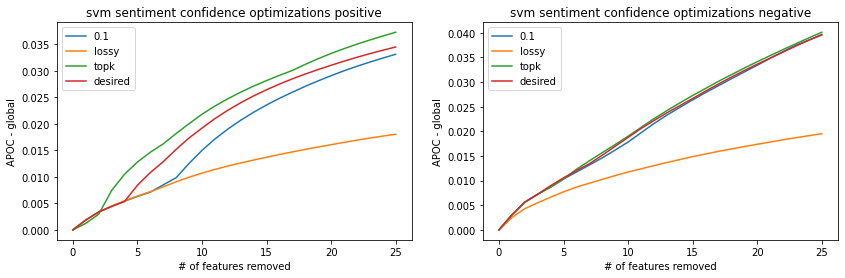

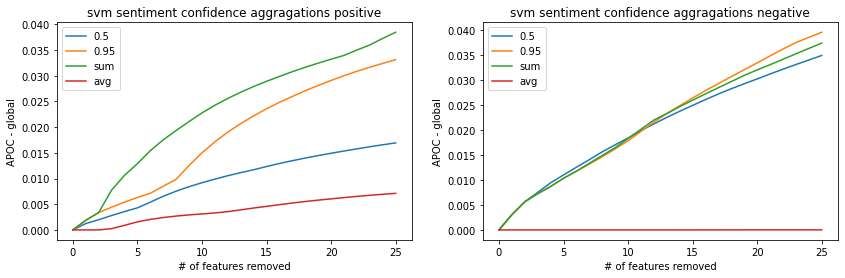

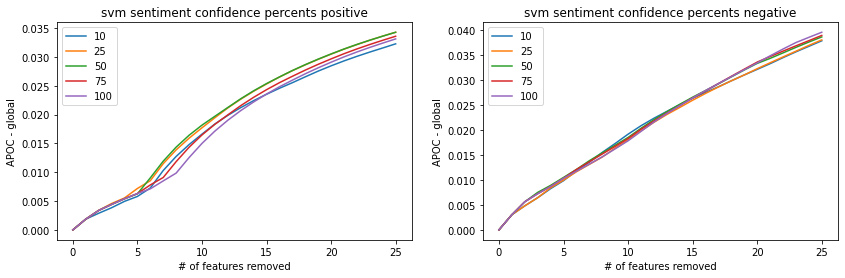

In [76]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## SVM Dilemma

In [8]:
dataset_name = 'dilemma'
model_type = 'svm'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [51]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, f"{dataset_name} {sorting} {delta}", modified = True, num_removes = 30)

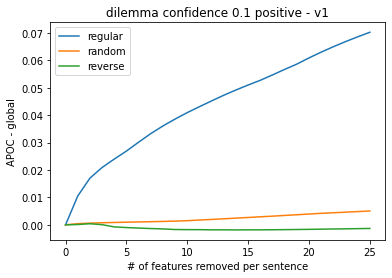

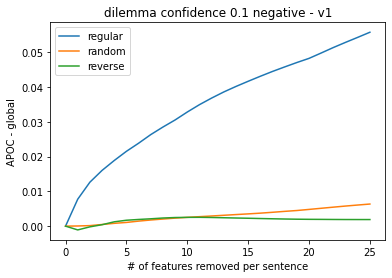

In [52]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

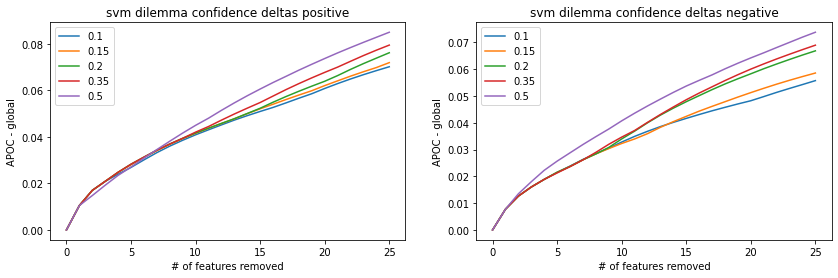

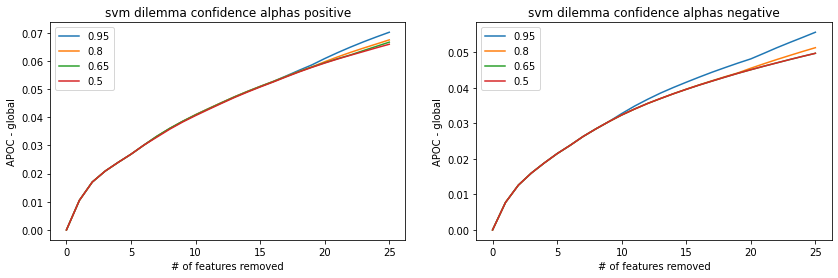

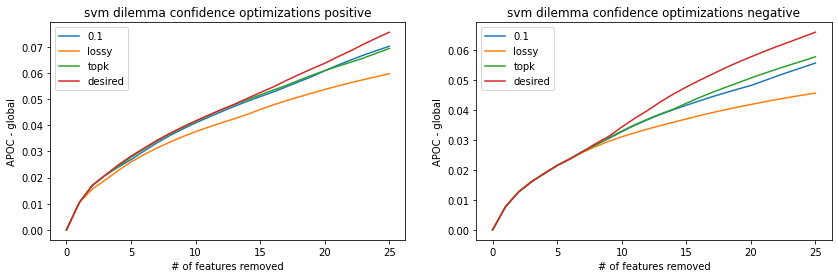

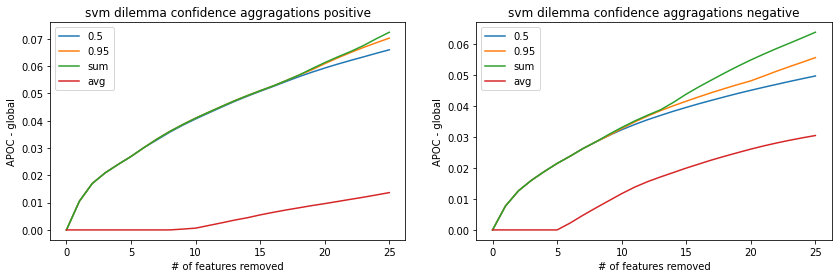

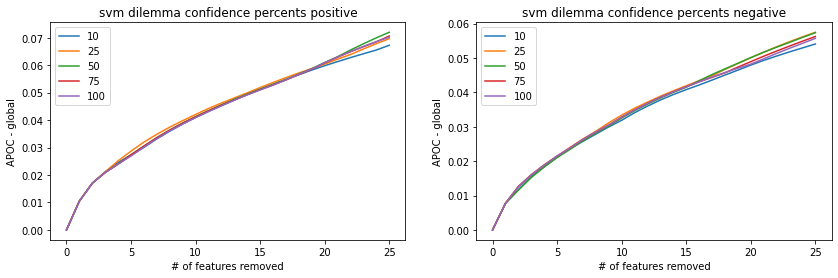

In [78]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## Logistic Corona

In [12]:
dataset_name = 'corona'
model_type = 'logistic'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [9]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

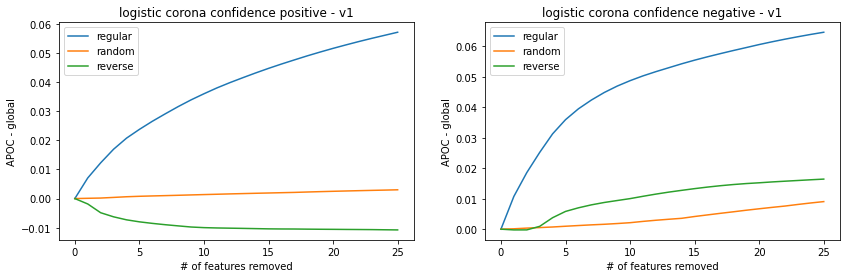

In [10]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

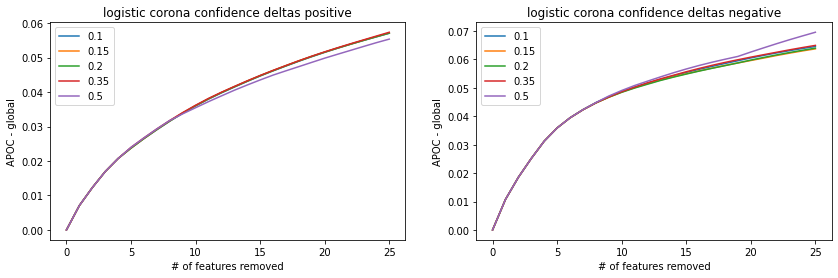

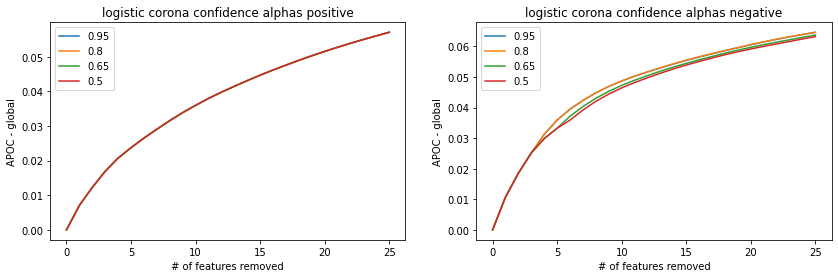

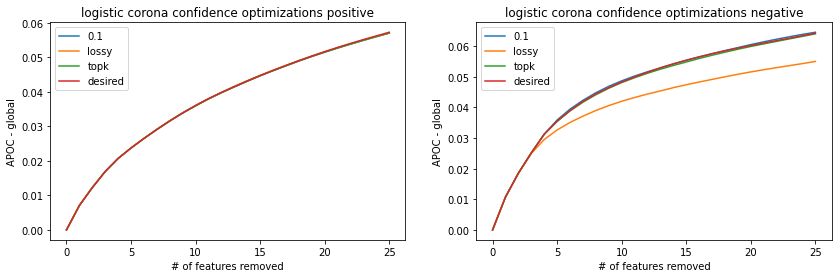

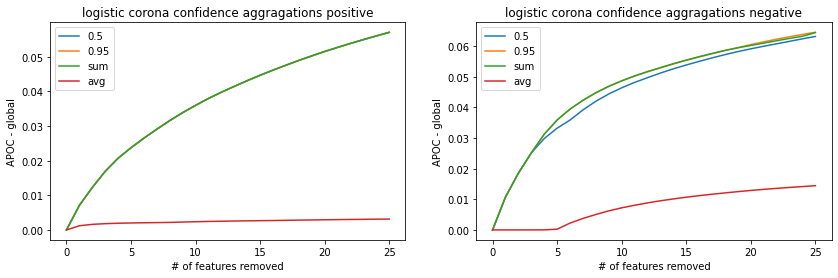

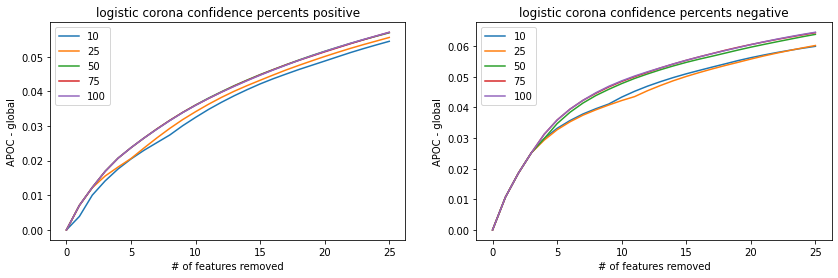

In [13]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## Logistic Dilemma

In [22]:
dataset_name = 'dilemma'
model_type = 'logistic'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [15]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

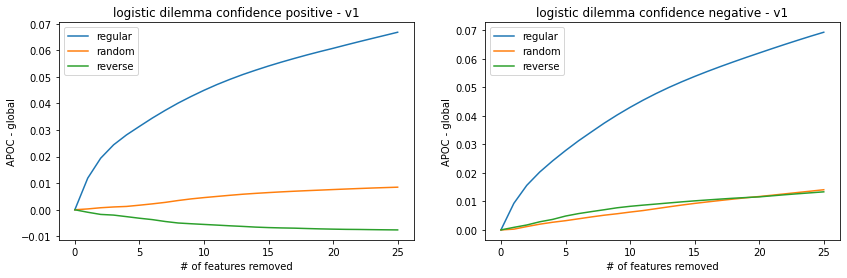

In [16]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

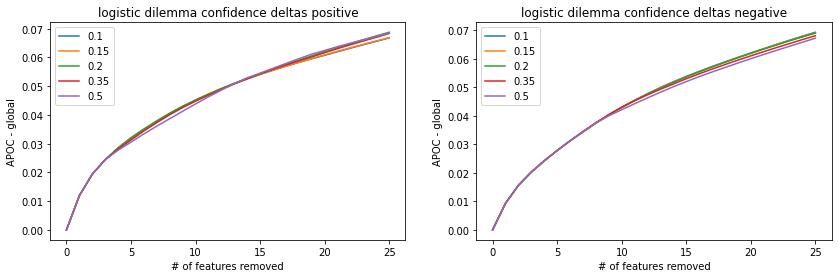

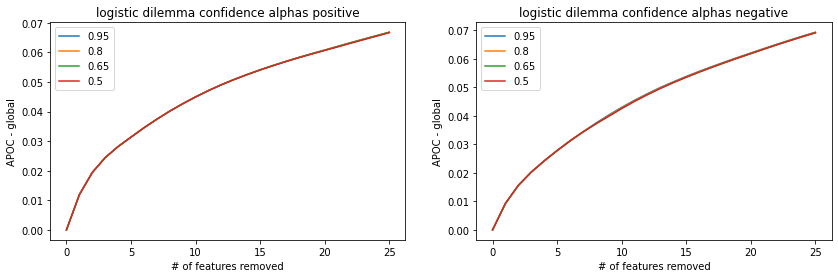

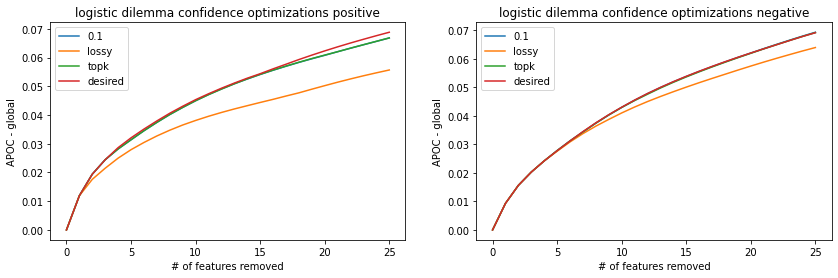

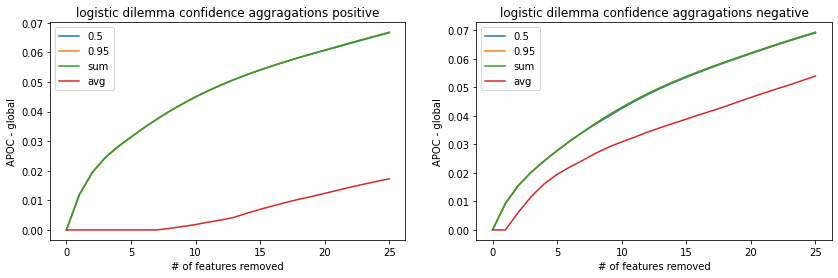

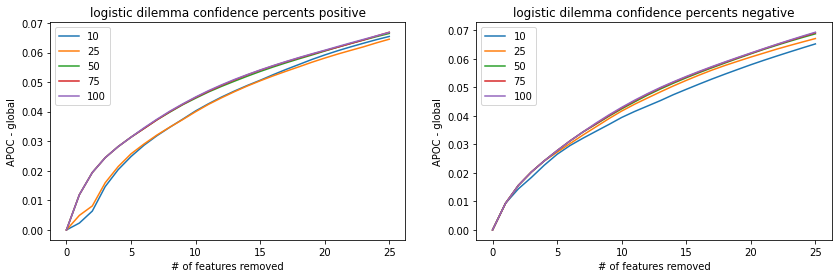

In [23]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)

## Logistic Sentiment

In [4]:
dataset_name = 'sentiment'
model_type = 'logistic'
folder_name = f'results/new/{model_type}/{dataset_name}/{sorting}/{delta}'
anchor_examples = pickle.load(open(f"{folder_name}/anchor_examples.pickle", "rb" ))
labels = pickle.load(open(f"{folder_name}/predictions.pickle", "rb" ))
model = load_model(f'models/{model_type}/new/{dataset_name}/traced.pt').to(device).eval()
myUtils.model = model
title = f"{model_type} {dataset_name} {sorting}"

### Apoc

In [25]:
pos_scores, neg_scores = ScoreUtils.get_scores_dict(folder_name, trail_path = "scores.xlsx")
pos_tokens, neg_tokens = list(pos_scores.keys()), list(neg_scores.keys())
apoc = APOC(model, tokenizer, anchor_examples, labels, pos_tokens, neg_tokens, title, modified = True, num_removes = 30)

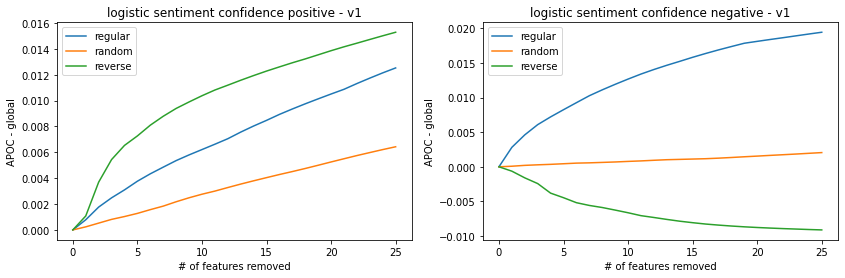

In [26]:
apoc.apoc_global('v1', 'remove')

In [ ]:
apoc.apoc_global('v2', 'remove')

In [ ]:
apoc.apoc_global('v1', 'replace')

In [ ]:
apoc.apoc_global('v2', 'replace')

### Compare

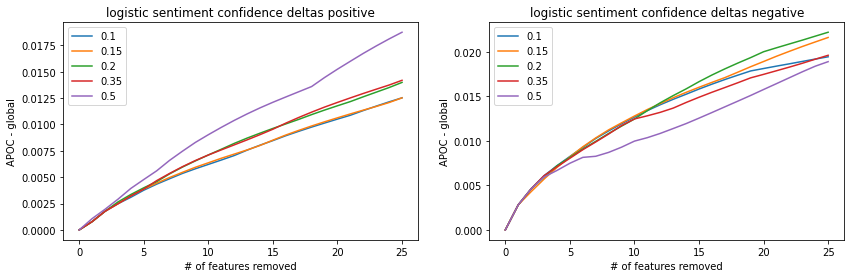

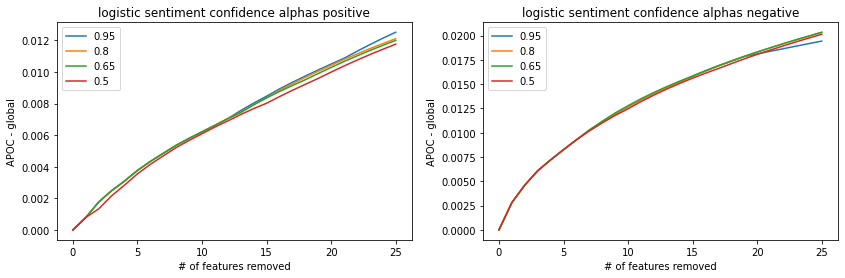

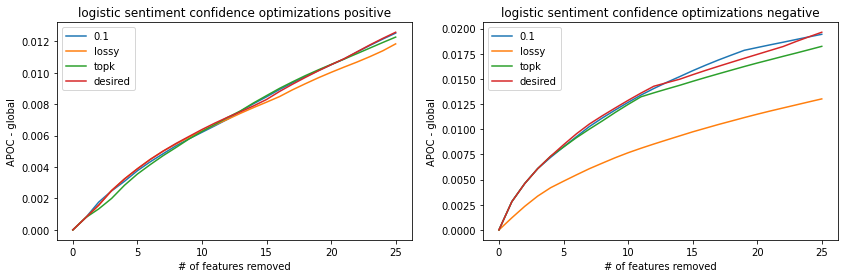

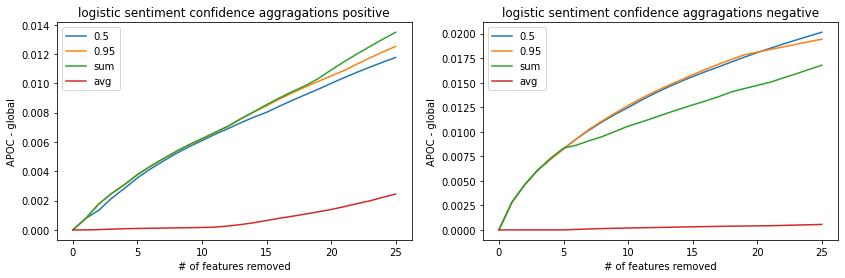

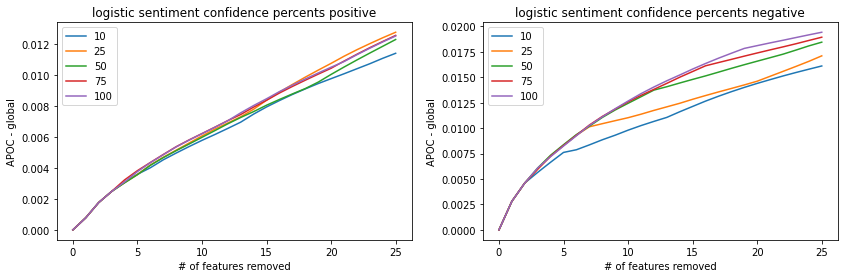

In [5]:
APOC.compare_all(folder_name, model, tokenizer, anchor_examples, labels, title, modified = True, num_removes = 30)